# Download data set
download CIFAR100 and split the dataset between training and test data

In [1]:
#task 1 download the CIFAR100 set
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#task 2 splita the set
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Plot images

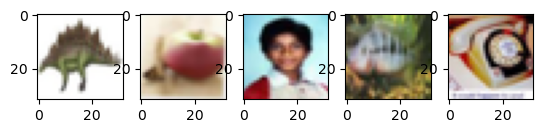

In [3]:
# plot images
import matplotlib.pyplot as plt

plt.subplot(1, 5, 1)
plt.imshow(X_train[1])
plt.subplot(1, 5, 2)
plt.imshow(X_train[2])
plt.subplot(1, 5, 3)
plt.imshow(X_train[3])
plt.subplot(1, 5, 4)
plt.imshow(X_train[4])
plt.subplot(1, 5, 5)
plt.imshow(X_train[5])

# Normalize the test and train images
to be in the range 0/1

In [4]:
#task 3 normalizse the pixel values
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
tf.info(X_train)

# Encode output class labels
categorize train and test class labels

In [5]:
#encode the labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train.shape()

# Model 1 - structure definition
defined , train and evaluate a first model with:
- input layer (32 x 32, RGB)
- first convolutional layer with kernel 3x3 (filter) and 16 filters
- second conv. layer with 32 filters, kernel 3x3
- third conv. layer 64 filters and kernel 3x3
- pooling layer with 2x2 filter size
- fourth conv. layer with 128 filters , kernel 3x3
- flattening layer to be linked with the fully connected network

Fully connected network:
- 256 neurons wtih relu activation
- 256 neurons with relu activation
- 100 neurons (representing the number of the dataset classes to be recongnized) with softmax (otuputting the probability of each class to be identified)

In [6]:
#taks 4 compile, train, evaluate a CNN model
model_base = tf.keras.Sequential()

model_base.add(Conv2D(16,(3,3),input_shape = (32,32,3), padding='same', activation='relu'))

model_base.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model_base.add(Conv2D(64,(3,3), padding='same', activation='relu'))

model_base.add(MaxPooling2D(2, 2))
model_base.add(Conv2D(128,(3,3), padding='same', activation='relu'))

model_base.add(Flatten())

model_base.add(Dense(256, activation ='relu'))
model_base.add(Dense(256, activation ='relu'))

model_base.add(Dense(100, activation ='softmax'))

#first model 0.56 accuracy

# Model 2 - structure definition
defined , train and evaluate a second model with:
- input layer (32 x 32, RGB)
- first convolutional layer with kernel 3x3 (filter) and 32 filters
- second conv. layer with 64 filters, kernel 3x3
- pooling layer with 2x2 filter size
- third conv. layer 128 filters and kernel 3x3
- fourth conv. layer 128 filters and kernel 3x3
- pooling layer with 2x2 filter size
- fifth conv. layer 256 filters and kernel 3x3
- pooling layer with 2x2 filter size
- flattening layer to be linked with the fully connected network

Fully connected network:
- 1024 neurons wtih relu activation
- 512 neurons with relu activation
- 100 neurons (representing the number of the dataset classes to be recongnized) with softmax (otuputting the probability of each class to be identified)

In [12]:
#model 2
model_base = tf.keras.Sequential()
model_base.add(Conv2D(32,(3,3),input_shape = (32,32,3), padding='same', activation='relu'))

model_base.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model_base.add(MaxPooling2D(2, 2))
model_base.add(Conv2D(128,(3,3), padding='same', activation='relu'))

model_base.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model_base.add(MaxPooling2D(2, 2))

model_base.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model_base.add(MaxPooling2D(2, 2))

model_base.add(Flatten())

model_base.add(Dense(1024, activation ='relu'))
model_base.add(Dense(512, activation ='relu'))

model_base.add(Dense(100, activation ='softmax'))
#0.646 accuracy

In [13]:
model_base.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

# Compiling the model
define the optimizer as Adam with LR=0.0001
loss function categorical_crossentropy (for non hotencoded labels using sparse_categorigal_crossentropy)
and metric as accuracy

In [14]:
optimizer = tf.keras.optimizers.Adam(0.0001)
model_base.compile(loss='categorical_crossentropy',
               optimizer= optimizer,
               metrics='accuracy')

# Early stopping
define eraly stop strategy within training in case of convergence and limited increase in accuracy defined as 0.001 difference

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

In [16]:
history = model_base.fit(X_train, y_train, epochs=20,shuffle = True, batch_size = 64, callbacks=[earlyStopping], validation_data=(X_test, y_test))

Epoch 1/20
782/782 [==============================] - 137s 172ms/step - loss: 3.9530 - accuracy: 0.0999 - val_loss: 3.4864 - val_accuracy: 0.1731
Epoch 2/20
782/782 [==============================] - 135s 172ms/step - loss: 3.2139 - accuracy: 0.2279 - val_loss: 3.0532 - val_accuracy: 0.2617
Epoch 3/20
782/782 [==============================] - 159s 203ms/step - loss: 2.8303 - accuracy: 0.2992 - val_loss: 2.8081 - val_accuracy: 0.3037
Epoch 4/20
782/782 [==============================] - 152s 194ms/step - loss: 2.5352 - accuracy: 0.3617 - val_loss: 2.6717 - val_accuracy: 0.3309
Epoch 5/20
782/782 [==============================] - 154s 196ms/step - loss: 2.2864 - accuracy: 0.4127 - val_loss: 2.5398 - val_accuracy: 0.3709
Epoch 6/20
782/782 [==============================] - 150s 192ms/step - loss: 2.0546 - accuracy: 0.4646 - val_loss: 2.4866 - val_accuracy: 0.3864
Epoch 7/20
782/782 [==============================] - 146s 187ms/step - loss: 1.8026 - accuracy: 0.5192 - val_loss: 2.4998 -

# Plotting accurancy and loss
analizing reached accurancy between train and test dataset and as well loss. Investigate results and possible overfitting

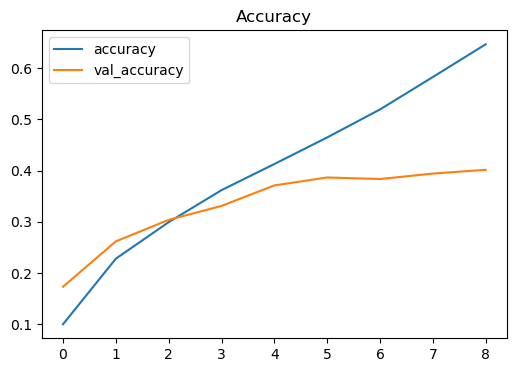

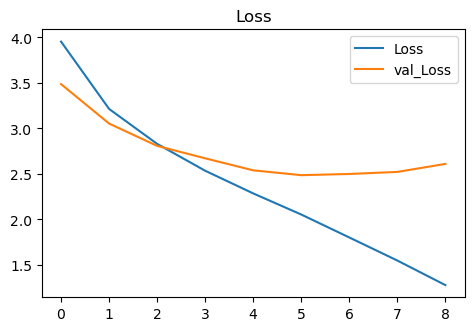

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.legend()

# Test model against image
test the model behaviour directly on a specific image

1/1 [==============================] - 0s 188ms/step


'tulips'

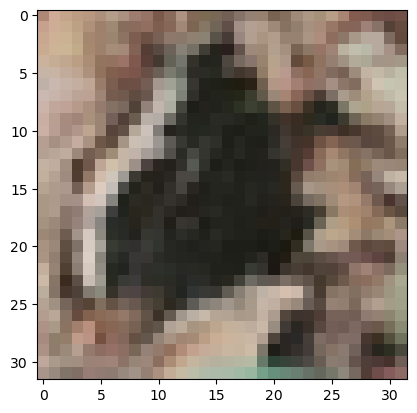

In [18]:
import numpy as np

labels = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
          'bottles', 'bowls', 'cans', 'cups', 'plates', 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 
          'bed', 'chair', 'couch', 'table', 'wardrobe' , 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf',
          'bridge', 'castle', 'house', 'road', 'skyscraper' , 'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
          'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm', 'baby', 'boy', 'girl', 'man', 'woman',
          'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',  'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple', 'oak', 'palm', 'pine', 'willow',
          'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

plt.imshow(X_test[7])

pred = np.argmax(model_base.predict(X_test[7].reshape(1, 32, 32, 3)))
labels[pred]